In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)

0.25.3


In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [4]:
X = df[['4046','4225', 'Total Volume']].to_numpy()

In [5]:
y =  df['4770'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.20, random_state=42)

## Linear Regression

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [-0.00095882  0.06597674  0.00525117]
Intercept:  -818.9137858644026


In [9]:
from sklearn.metrics import r2_score
pred_y = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred_y , test_y) )

Mean absolute error: 14472.51
Residual sum of squares (MSE): 2136146901.59
R2-score: 0.78


In [10]:
print(pred_y)
len(pred_y)

[ 1990.48163618  5817.83866102  -796.88848785 ... 21724.98279996
  -689.42212501   884.63953944]


3650

In [11]:
print(test_y)
len(test_y)

[ 2998.74   100.62     0.   ... 12047.67     0.    2330.29]


3650

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


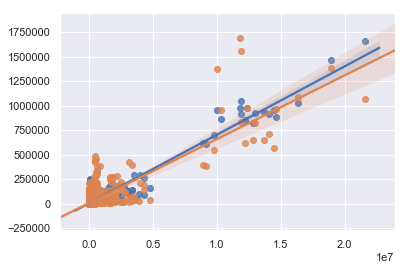

In [33]:
ax = sns.regplot(x=test_x[:,0],y=pred_y)
sns.regplot(x=test_x[:,0],y=test_y,ax=ax)